In [1]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from tqdm import tqdm


C:\Users\ABHIRAM\anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (3.0.4)/charset_normalizer (2.1.0) doesn't match a supported version!
  warnings.warn(


In [3]:
# 2. find url and store it in a variable
url = "https://www.popvortex.com/music/charts/top-100-songs.php"


In [4]:
# 3. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [5]:
# response.content

In [6]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [7]:
# 4.2. check that the html code looks like it should
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><title>iTunes Top 100 Songs Chart 2023</title><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="iTunes top 100 songs chart list. The most popular hit music and trending songs of 2023. Chart of today's current iTunes top 100 songs is updated daily." name="description"/><meta content="iTunes Top 100 Songs Chart 2023" property="og:title"><meta content="Chart of the top 100 songs on iTunes. Chart list of the top 100 song downloads of 2023 is updated daily." property="og:description"><meta content="article" property="og:type"><meta content="https://www.popvortex.com/images/logo-facebook.png" property="og:image"/><meta content="PopVortex" property="og:site_name"/><meta content="https://www.popvortex.com/music/charts/top-100-songs.php" property="og:url"/><meta content="100000239962942" property="fb:admins"/><meta content="178831188827052" property="fb:app_id"/><link href="/favicon.png" rel="shortcut

In [8]:
soup.select(".chart-wrapper")

[<div class="chart-wrapper"><div class="feed-item music-chart flex-row new-release" id="chart-position-1"><div class="cover-art col-xs-12 col-sm-4"><p class="chart-position">1</p><img alt="Last Time I Saw You (Sped Up) - Nicki Minaj Cover Art" class="cover-image" data-pin-description="Last Time I Saw You (Sped Up) - Nicki Minaj" data-pin-media="https://is1-ssl.mzstatic.com/image/thumb/Music116/v4/57/80/86/578086ef-4fab-34e0-8da8-852191f0213c/23UM1IM06340.rgb.jpg/1200x1200bb.png" data-pin-url="https://www.popvortex.com/music/charts/top-100-songs.php" height="170" loading="lazy" src="https://is1-ssl.mzstatic.com/image/thumb/Music116/v4/57/80/86/578086ef-4fab-34e0-8da8-852191f0213c/23UM1IM06340.rgb.jpg/170x170bb.png" width="170"/> <audio controls="" controlslist="nodownload" preload="none"><source src="https://audio-ssl.itunes.apple.com/itunes-assets/AudioPreview126/v4/b6/c6/0b/b6c60b2f-333b-bea5-eb9f-7867e910b274/mzaf_11569606631262562332.plus.aac.p.m4a"/></audio> </div><div class="chart

In [9]:
# body > div.container > div:nth-child(4) > div.col-xs-12.col-md-8 > div.chart-wrapper

In [10]:
soup.select(".title-artist")

[<p class="title-artist"><cite class="title">Last Time I Saw You (Sped Up)</cite><em class="artist">Nicki Minaj</em></p>,
 <p class="title-artist"><cite class="title">Rich Men North of Richmond</cite><em class="artist">Oliver Anthony Music</em></p>,
 <p class="title-artist"><cite class="title">Bongos</cite><em class="artist">Cardi B &amp; Megan Thee Stallion</em></p>,
 <p class="title-artist"><cite class="title">Slow Dancing</cite><em class="artist">V</em></p>,
 <p class="title-artist"><cite class="title">Slow Dancing (Piano Ver.)</cite><em class="artist">V</em></p>,
 <p class="title-artist"><cite class="title">I Remember Everything (feat. Kacey Musgraves)</cite><em class="artist">Zach Bryan</em></p>,
 <p class="title-artist"><cite class="title">Paint The Town Red</cite><em class="artist">Doja Cat</em></p>,
 <p class="title-artist"><cite class="title">Margaritaville</cite><em class="artist">Jimmy Buffett</em></p>,
 <p class="title-artist"><cite class="title">Come Monday</cite><em class

In [11]:
title = []
artist = []

num_iter = len(soup.select(".title-artist"))
tClist = soup.select(".title-artist")

# iterate through the result set and retrive all the data
for i in range(num_iter):
    title.append(tClist[i].find(class_="title").get_text())
    artist.append(tClist[i].find(class_="artist").get_text())

print(artist)
print(title)

['Nicki Minaj', 'Oliver Anthony Music', 'Cardi B & Megan Thee Stallion', 'V', 'V', 'Zach Bryan', 'Doja Cat', 'Jimmy Buffett', 'Jimmy Buffett', 'The Rolling Stones', 'Paul Russell', 'V', 'Luke Combs', 'V', 'Nicki Minaj', 'Miley Cyrus', 'V', 'V', 'Morgan Wallen', 'Chris Stapleton', 'Taylor Swift', 'Jelly Roll', 'Dua Lipa', 'Cardi B & Megan Thee Stallion', 'Jimmy Buffett', 'Gary Wright', 'Teddy Swims', 'Jimmy Buffett', 'Morgan Wallen', 'Lainey Wilson', 'Jason Aldean', 'Jelly Roll', 'Jimmy Buffett', 'Oliver Anthony Music', 'Jimmy Buffett', 'Miley Cyrus', 'Rema & Selena Gomez', 'Olivia Rodrigo', 'Nickelback', 'Bailey Zimmerman', 'Oliver Anthony Music', 'Will Dempsey', 'Miley Cyrus', 'Tyler Childers', 'Fleetwood Mac', 'Jung Kook & Latto', 'Jung Kook & Latto', 'Gary Wright', 'Jung Kook, Latto & Alesso', 'Smash Mouth', 'Jimmy Buffett', 'Zhang Zhe Han', 'Metallica', 'Zach Bryan', 'Luke Combs', 'Jimmy Buffett', 'Jung Kook & Latto', 'Jung Kook & Latto', 'Jung Kook & Latto', 'Zach Bryan', 'Jung Ko

In [12]:
df=pd.DataFrame({"artist":artist,"title":title})
df

artist                          title
0                     Nicki Minaj  Last Time I Saw You (Sped Up)
1            Oliver Anthony Music     Rich Men North of Richmond
2   Cardi B & Megan Thee Stallion                         Bongos
3                               V                   Slow Dancing
4                               V      Slow Dancing (Piano Ver.)
..                            ...                            ...
95                Chris Stapleton              Tennessee Whiskey
96                    Evanescence               Bring Me to Life
97                          HARDY                      TRUCK BED
98              Jung Kook & Latto          Seven (Nightfall Mix)
99              Jung Kook & Latto             Seven (Island Mix)

[100 rows x 2 columns]

In [13]:
# songs.to_csv("songs.to_csv",index='False')

In [14]:


# # Input song from the user
# input_song = input("Enter a song: ")

# # Filter the DataFrame to find songs by the same artist
# similar_songs = df[df['artist'] == input_song]

# # Check if any similar songs were found
# if similar_songs.empty:
#     print("No similar songs found.")
# else:
#     # Select a random song from the similar songs
#     recommended_song = similar_songs.sample(n=1)

#     # Print the recommended song
#     print("Recommended Song:")
#     print(recommended_song[['artist', 'title']])


# search engine

In [15]:
import random


In [16]:
# def search_random_title(input_title):
#     if input_title in df['title'].values:
#         while True:
#             random_title = random.choice(df['title'])
#             if random_title != input_title:
#                 return random_title
#     else:
#         return "Sorry, we don't have this title."

# input_title = input("Enter a song title: ")
# search_random_title(input_title)

In [17]:
# Adding more songs

In [18]:
secrets_file = open("secret.txt","r")


In [19]:
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [20]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['Client ID'],
                                                           client_secret=secrets_dict['Client secret']))

In [21]:
# Playlists
# We will need to collect a "database" of songs. Playlists are a good way to access relatively large amounts of songs.

In [22]:
playlist = sp.user_playlist_tracks("spotify", "5S8SJdl1BDc0ugpkEvFsIL")


In [23]:
playlist["total"] 


10000

In [24]:
len(playlist["items"])


100

In [25]:
playlist['next']


'https://api.spotify.com/v1/playlists/5S8SJdl1BDc0ugpkEvFsIL/tracks?offset=100&limit=100&additional_types=track'

In [26]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000) # respectful nap
    return tracks

In [27]:
# with this spotify playlist getting error in chunks why? resolve it later!
# all_tracks = get_playlist_tracks("5S8SJdl1BDc0ugpkEvFsIL")
# len(all_tracks)

In [28]:
all_tracks = get_playlist_tracks("54nv8jbrm4JoHEZ49Qvjgl")
len(all_tracks)

9925

In [29]:
from pandas import json_normalize


In [30]:
spotify = json_normalize(all_tracks)
#spotify

In [31]:
spotify.columns


Index(['added_at', 'is_local', 'primary_color',
       'added_by.external_urls.spotify', 'added_by.href', 'added_by.id',
       'added_by.type', 'added_by.uri', 'track.album.album_type',
       'track.album.artists', 'track.album.available_markets',
       'track.album.external_urls.spotify', 'track.album.href',
       'track.album.id', 'track.album.images', 'track.album.name',
       'track.album.release_date', 'track.album.release_date_precision',
       'track.album.total_tracks', 'track.album.type', 'track.album.uri',
       'track.artists', 'track.available_markets', 'track.disc_number',
       'track.duration_ms', 'track.episode', 'track.explicit',
       'track.external_ids.isrc', 'track.external_urls.spotify', 'track.href',
       'track.id', 'track.is_local', 'track.name', 'track.popularity',
       'track.preview_url', 'track.track', 'track.track_number', 'track.type',
       'track.uri', 'video_thumbnail.url', 'track'],
      dtype='object')

In [32]:
spotify["track.artists"]


0       [{'external_urls': {'spotify': 'https://open.s...
1       [{'external_urls': {'spotify': 'https://open.s...
2       [{'external_urls': {'spotify': 'https://open.s...
3       [{'external_urls': {'spotify': 'https://open.s...
4       [{'external_urls': {'spotify': 'https://open.s...
                              ...                        
9920    [{'external_urls': {'spotify': 'https://open.s...
9921    [{'external_urls': {'spotify': 'https://open.s...
9922    [{'external_urls': {'spotify': 'https://open.s...
9923    [{'external_urls': {'spotify': 'https://open.s...
9924    [{'external_urls': {'spotify': 'https://open.s...
Name: track.artists, Length: 9925, dtype: object

In [33]:
def list_to_dict(x):
    if isinstance(x, list):
        return {i: x[i] for i in range(len(x))}
    else:
        return {} 

In [34]:
spotify['artist_dict'] = spotify['track.artists'].apply(lambda x: list_to_dict(x))
#spotify

In [35]:
def expand_list_dict2(row):
    df = pd.DataFrame.from_dict(row['artist_dict'], orient='index')
    df['song_id'] = row['track.id']
    return df

In [36]:
spotify['artists_dfs'] = spotify.apply(expand_list_dict2, axis=1)
spotify['artists_dfs'][3]

external_urls  \
0  {'spotify': 'https://open.spotify.com/artist/3...   

                                                href                      id  \
0  https://api.spotify.com/v1/artists/3AQRLZ9PuTA...  3AQRLZ9PuTAozP28Skbq8V   

         name    type                                    uri  \
0  The Script  artist  spotify:artist:3AQRLZ9PuTAozP28Skbq8V   

                  song_id  
0  4Musyaro0NM5Awx8b5c627

In [37]:
artist_df2 = pd.DataFrame(columns=['external_urls', 'href', 'id', 'name', 'type', 'uri'])
for val in spotify['artists_dfs']:
    #display(val)
    artist_df2 = pd.concat([artist_df2, val], axis=0)
    
#artist_df2

In [38]:
df_merged2 = pd.merge(left=spotify,
                    right=artist_df2,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
#df_merged2

In [39]:
spotify_songs = df_merged2[['track.name', 'name', 'song_id']]
spotify_songs

track.name             name                 song_id
0                        Firework       Katy Perry  4lCv7b86sLynZbXhfScfm2
1                      All We Are      OneRepublic  1Jx69b09LKTuBQxkEiFfVX
2                   Wake Up Alone    Amy Winehouse  4u83mwF5tUuWlXS86UOXdu
3      The Man Who Can't Be Moved       The Script  4Musyaro0NM5Awx8b5c627
4             Rolling in the Deep            Adele  1CkvWZme3pRgbzaxZnTl5X
...                           ...              ...                     ...
12231                  I AM WOMAN        Emmy Meli  3nOz1U41SZZ0N3fuUWr9nb
12232                    The Girl  City and Colour  1IFRVS4t1olI0XG9RBWdKH
12233                 The Funeral   Band of Horses  5lRzWDEe7UuedU2QPsFg0K
12234             Hallucinogenics      Matt Maeson  6bLU8e0LGyztE9iD5DWBQ1
12235                      Brazil   Declan McKenna  5ftdTvmQjjsL23t7jxADfI

[12236 rows x 3 columns]

# Audio features

In [40]:
# # get the audio features for a song
# sp.audio_features('5S8SJdl1BDc0ugpkEvFsIL')

In [41]:
chunks = [(i, i+100) for i in range(0, len(spotify_songs), 100)]
audio_features_list = []
for chunk in chunks:
    id_list100 = spotify_songs['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)


12236

In [42]:
audio_features_df = json_normalize(audio_features_list)

In [43]:
audio_features_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.638   0.826    8    -4.968     1       0.0479        0.1390   
1             0.397   0.817    2    -5.495     1       0.0420        0.0966   
2             0.384   0.527   11    -5.294     0       0.0269        0.5420   
3             0.608   0.629   10    -5.024     1       0.0264        0.4230   
4             0.729   0.756    8    -5.119     1       0.0294        0.1310   
...             ...     ...  ...       ...   ...          ...           ...   
12231         0.646   0.471   10    -9.247     1       0.1570        0.1220   
12232         0.404   0.542   10    -7.578     1       0.0349        0.8370   
12233         0.319   0.757    0    -6.117     0       0.0432        0.0160   
12234         0.549   0.653    0    -7.470     1       0.0503        0.4570   
12235         0.689   0.617    4    -5.196     1       0.0290        0.0918   

       instrumentalness  liveness  valence    tempo            type  \
0              0.000000    0.0803    0.649  124.072  audio_features   
1              0.000008    0.3160    0.416  158.004  audio_features   
2              0.000000    0.1560    0.222  100.730  audio_features   
3              0.000000    0.0978    0.325   99.953  audio_features   
4              0.000000    0.0527    0.522  104.945  audio_features   
...                 ...       ...      ...      ...             ...   
12231          0.000000    0.1250    0.455  170.084  audio_features   
12232          0.000072    0.1370    0.183  109.166  audio_features   
12233          0.000000    0.1020    0.101  122.465  audio_features   
12234          0.000000    0.0969    0.287  121.348  audio_features   
12235          0.000021    0.0816    0.682  121.062  audio_features   

                           id                                   uri  \
0      4lCv7b86sLynZbXhfScfm2  spotify:track:4lCv7b86sLynZbXhfScfm2   
1      1Jx69b09LKTuBQxkEiFfVX  spotify:track:1Jx69b09LKTuBQxkEiFfVX   
2      4u83mwF5tUuWlXS86UOXdu  spotify:track:4u83mwF5tUuWlXS86UOXdu   
3      4Musyaro0NM5Awx8b5c627  spotify:track:4Musyaro0NM5Awx8b5c627   
4      1CkvWZme3pRgbzaxZnTl5X  spotify:track:1CkvWZme3pRgbzaxZnTl5X   
...                       ...                                   ...   
12231  3nOz1U41SZZ0N3fuUWr9nb  spotify:track:3nOz1U41SZZ0N3fuUWr9nb   
12232  1IFRVS4t1olI0XG9RBWdKH  spotify:track:1IFRVS4t1olI0XG9RBWdKH   
12233  5lRzWDEe7UuedU2QPsFg0K  spotify:track:5lRzWDEe7UuedU2QPsFg0K   
12234  6bLU8e0LGyztE9iD5DWBQ1  spotify:track:6bLU8e0LGyztE9iD5DWBQ1   
12235  5ftdTvmQjjsL23t7jxADfI  spotify:track:5ftdTvmQjjsL23t7jxADfI   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/4lCv7b86sLyn...   
1      https://api.spotify.com/v1/tracks/1Jx69b09LKTu...   
2      https://api.spotify.com/v1/tracks/4u83mwF5tUuW...   
3      https://api.spotify.com/v1/tracks/4Musyaro0NM5...   
4      https://api.spotify.com/v1/tracks/1CkvWZme3pRg...   
...                                                  ...   
12231  https://api.spotify.com/v1/tracks/3nOz1U41SZZ0...   
12232  https://api.spotify.com/v1/tracks/1IFRVS4t1olI...   
12233  https://api.spotify.com/v1/tracks/5lRzWDEe7Uue...   
12234  https://api.spotify.com/v1/tracks/6bLU8e0LGyzt...   
12235  https://api.spotify.com/v1/tracks/5ftdTvmQjjsL...   

                                            analysis_url  duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/4lCv...       227880   
1      https://api.spotify.com/v1/audio-analysis/1Jx6...       266227   
2      https://api.spotify.com/v1/audio-analysis/4u83...       221200   
3      https://api.spotify.com/v1/audio-analysis/4Mus...       241467   
4      https://api.spotify.com/v1/audio-analysis/1Ckv...       228293   
...                                                  ...          ...   
12231  https://api.spotify.com/v1/audio-analysis/3nOz...       232813   
12232  https://api.spotify.com/v1/audio-analysi

In [44]:
df_w_audio_ft = pd.merge(left=spotify_songs,
                        right=audio_features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')

In [45]:
df_w_audio_ft

track.name             name                 song_id  \
0                        Firework       Katy Perry  4lCv7b86sLynZbXhfScfm2   
1                      All We Are      OneRepublic  1Jx69b09LKTuBQxkEiFfVX   
2                   Wake Up Alone    Amy Winehouse  4u83mwF5tUuWlXS86UOXdu   
3      The Man Who Can't Be Moved       The Script  4Musyaro0NM5Awx8b5c627   
4             Rolling in the Deep            Adele  1CkvWZme3pRgbzaxZnTl5X   
...                           ...              ...                     ...   
21153                  I AM WOMAN        Emmy Meli  3nOz1U41SZZ0N3fuUWr9nb   
21154                    The Girl  City and Colour  1IFRVS4t1olI0XG9RBWdKH   
21155                 The Funeral   Band of Horses  5lRzWDEe7UuedU2QPsFg0K   
21156             Hallucinogenics      Matt Maeson  6bLU8e0LGyztE9iD5DWBQ1   
21157                      Brazil   Declan McKenna  5ftdTvmQjjsL23t7jxADfI   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.638   0.826    8    -4.968     1       0.0479        0.1390   
1             0.397   0.817    2    -5.495     1       0.0420        0.0966   
2             0.384   0.527   11    -5.294     0       0.0269        0.5420   
3             0.608   0.629   10    -5.024     1       0.0264        0.4230   
4             0.729   0.756    8    -5.119     1       0.0294        0.1310   
...             ...     ...  ...       ...   ...          ...           ...   
21153         0.646   0.471   10    -9.247     1       0.1570        0.1220   
21154         0.404   0.542   10    -7.578     1       0.0349        0.8370   
21155         0.319   0.757    0    -6.117     0       0.0432        0.0160   
21156         0.549   0.653    0    -7.470     1       0.0503        0.4570   
21157         0.689   0.617    4    -5.196     1       0.0290        0.0918   

       ...  liveness  valence    tempo            type  \
0      ...    0.0803    0.649  124.072  audio_features   
1      ...    0.3160    0.416  158.004  audio_features   
2      ...    0.1560    0.222  100.730  audio_features   
3      ...    0.0978    0.325   99.953  audio_features   
4      ...    0.0527    0.522  104.945  audio_features   
...    ...       ...      ...      ...             ...   
21153  ...    0.1250    0.455  170.084  audio_features   
21154  ...    0.1370    0.183  109.166  audio_features   
21155  ...    0.1020    0.101  122.465  audio_features   
21156  ...    0.0969    0.287  121.348  audio_features   
21157  ...    0.0816    0.682  121.062  audio_features   

                           id                                   uri  \
0      4lCv7b86sLynZbXhfScfm2  spotify:track:4lCv7b86sLynZbXhfScfm2   
1      1Jx69b09LKTuBQxkEiFfVX  spotify:track:1Jx69b09LKTuBQxkEiFfVX   
2      4u83mwF5tUuWlXS86UOXdu  spotify:track:4u83mwF5tUuWlXS86UOXdu   
3      4Musyaro0NM5Awx8b5c627  spotify:track:4Musyaro0NM5Awx8b5c627   
4      1CkvWZme3pRgbzaxZnTl5X  spotify:track:1CkvWZme3pRgbzaxZnTl5X   
...                       ...                                   ...   
21153  3nOz1U41SZZ0N3fuUWr9nb  spotify:track:3nOz1U41SZZ0N3fuUWr9nb   
21154  1IFRVS4t1olI0XG9RBWdKH  spotify:track:1IFRVS4t1olI0XG9RBWdKH   
21155  5lRzWDEe7UuedU2QPsFg0K  spotify:track:5lRzWDEe7UuedU2QPsFg0K   
21156  6bLU8e0LGyztE9iD5DWBQ1  spotify:track:6bLU8e0LGyztE9iD5DWBQ1   
21157  5ftdTvmQjjsL23t7jxADfI  spotify:track:5ftdTvmQjjsL23t7jxADfI   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/4lCv7b86sLyn...   
1      https://api.spotify.com/v1/tracks/1Jx69b09LKTu...   
2      https://api.spotify.com/v1/tracks/4u83mwF5tUuW...   
3      https://api.spotify.com/v1/tracks/4Musyaro0NM5...   
4      https://api.spotify.com/v1/tracks/1CkvWZme3pRg...   
...                                                  ...   
21153  https://api.spotify.com/v1/tracks/3nOz1U41SZZ0...   
21154  https://api.spotify.com/v1/tracks/1IFRVS4t1olI...   
21155  https://api.spotify.com/v1/tracks/5lRzWD

In [46]:
df_w_audio_ft.isna().sum()


track.name          0
name                0
song_id             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [47]:
df_w_audio_ft=df_w_audio_ft.drop_duplicates()
len(df_w_audio_ft)

12158

# You want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

In [48]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D


In [49]:
df_n = df_w_audio_ft.select_dtypes(include=np.number)
df_n

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.638   0.826    8    -4.968     1       0.0479        0.1390   
1             0.397   0.817    2    -5.495     1       0.0420        0.0966   
2             0.384   0.527   11    -5.294     0       0.0269        0.5420   
3             0.608   0.629   10    -5.024     1       0.0264        0.4230   
4             0.729   0.756    8    -5.119     1       0.0294        0.1310   
...             ...     ...  ...       ...   ...          ...           ...   
21153         0.646   0.471   10    -9.247     1       0.1570        0.1220   
21154         0.404   0.542   10    -7.578     1       0.0349        0.8370   
21155         0.319   0.757    0    -6.117     0       0.0432        0.0160   
21156         0.549   0.653    0    -7.470     1       0.0503        0.4570   
21157         0.689   0.617    4    -5.196     1       0.0290        0.0918   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.000000    0.0803    0.649  124.072       227880   
1              0.000008    0.3160    0.416  158.004       266227   
2              0.000000    0.1560    0.222  100.730       221200   
3              0.000000    0.0978    0.325   99.953       241467   
4              0.000000    0.0527    0.522  104.945       228293   
...                 ...       ...      ...      ...          ...   
21153          0.000000    0.1250    0.455  170.084       232813   
21154          0.000072    0.1370    0.183  109.166       360107   
21155          0.000000    0.1020    0.101  122.465       322173   
21156          0.000000    0.0969    0.287  121.348       187173   
21157          0.000021    0.0816    0.682  121.062       252307   

       time_signature  
0                   4  
1                   4  
2                   3  
3                   4  
4                   4  
...               ...  
21153               4  
21154               4  
21155               4  
21156               4  
21157               4  

[12158 rows x 13 columns]

In [50]:
df_c = df_w_audio_ft.select_dtypes(include=object)
df_c


track.name             name                 song_id  \
0                        Firework       Katy Perry  4lCv7b86sLynZbXhfScfm2   
1                      All We Are      OneRepublic  1Jx69b09LKTuBQxkEiFfVX   
2                   Wake Up Alone    Amy Winehouse  4u83mwF5tUuWlXS86UOXdu   
3      The Man Who Can't Be Moved       The Script  4Musyaro0NM5Awx8b5c627   
4             Rolling in the Deep            Adele  1CkvWZme3pRgbzaxZnTl5X   
...                           ...              ...                     ...   
21153                  I AM WOMAN        Emmy Meli  3nOz1U41SZZ0N3fuUWr9nb   
21154                    The Girl  City and Colour  1IFRVS4t1olI0XG9RBWdKH   
21155                 The Funeral   Band of Horses  5lRzWDEe7UuedU2QPsFg0K   
21156             Hallucinogenics      Matt Maeson  6bLU8e0LGyztE9iD5DWBQ1   
21157                      Brazil   Declan McKenna  5ftdTvmQjjsL23t7jxADfI   

                 type                      id  \
0      audio_features  4lCv7b86sLynZbXhfScfm2   
1      audio_features  1Jx69b09LKTuBQxkEiFfVX   
2      audio_features  4u83mwF5tUuWlXS86UOXdu   
3      audio_features  4Musyaro0NM5Awx8b5c627   
4      audio_features  1CkvWZme3pRgbzaxZnTl5X   
...               ...                     ...   
21153  audio_features  3nOz1U41SZZ0N3fuUWr9nb   
21154  audio_features  1IFRVS4t1olI0XG9RBWdKH   
21155  audio_features  5lRzWDEe7UuedU2QPsFg0K   
21156  audio_features  6bLU8e0LGyztE9iD5DWBQ1   
21157  audio_features  5ftdTvmQjjsL23t7jxADfI   

                                        uri  \
0      spotify:track:4lCv7b86sLynZbXhfScfm2   
1      spotify:track:1Jx69b09LKTuBQxkEiFfVX   
2      spotify:track:4u83mwF5tUuWlXS86UOXdu   
3      spotify:track:4Musyaro0NM5Awx8b5c627   
4      spotify:track:1CkvWZme3pRgbzaxZnTl5X   
...                                     ...   
21153  spotify:track:3nOz1U41SZZ0N3fuUWr9nb   
21154  spotify:track:1IFRVS4t1olI0XG9RBWdKH   
21155  spotify:track:5lRzWDEe7UuedU2QPsFg0K   
21156  spotify:track:6bLU8e0LGyztE9iD5DWBQ1   
21157  spotify:track:5ftdTvmQjjsL23t7jxADfI   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/4lCv7b86sLyn...   
1      https://api.spotify.com/v1/tracks/1Jx69b09LKTu...   
2      https://api.spotify.com/v1/tracks/4u83mwF5tUuW...   
3      https://api.spotify.com/v1/tracks/4Musyaro0NM5...   
4      https://api.spotify.com/v1/tracks/1CkvWZme3pRg...   
...                                                  ...   
21153  https://api.spotify.com/v1/tracks/3nOz1U41SZZ0...   
21154  https://api.spotify.com/v1/tracks/1IFRVS4t1olI...   
21155  https://api.spotify.com/v1/tracks/5lRzWDEe7Uue...   
21156  https://api.spotify.com/v1/tracks/6bLU8e0LGyzt...   
21157  https://api.spotify.com/v1/tracks/5ftdTvmQjjsL...   

                                            analysis_url  
0      https://api.spotify.com/v1/audio-analysis/4lCv...  
1      https://api.spotify.com/v1/audio-analysis/1Jx6...  
2      https://api.spotify.com/v1/audio-analysis/4u83...  
3      https://api.spotify.com/v1/audio-analysis/4Mus...  
4      https://api.spotify.com/v1/audio-analysis/1Ckv...  
...                                                  ...  
21153  https://api.spotify.com/v1/audio-analysis/3nOz...  
21154  https://api.spotify.com/v1/audio-analysis/1IFR...  
21155  https://api.spotify.com/v1/audio-analysis/5lRz...  
21156  https://api.spotify.com/v1/audio-analysis/6bLU...  
21157  https://api.spotify.com/v1/audio-analysis/5ftd...  

[12158 rows x 8 columns]

In [51]:
X = pd.DataFrame(df_n)
# _ = pd.Series(df_c)
# Comment the different variables of this dataset
# Notice how they are all numerical - KMeans cannot deal with categorical variables
X.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.638   0.826    8    -4.968     1       0.0479        0.1390   
1         0.397   0.817    2    -5.495     1       0.0420        0.0966   
2         0.384   0.527   11    -5.294     0       0.0269        0.5420   
3         0.608   0.629   10    -5.024     1       0.0264        0.4230   
4         0.729   0.756    8    -5.119     1       0.0294        0.1310   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000000    0.0803    0.649  124.072       227880               4  
1          0.000008    0.3160    0.416  158.004       266227               4  
2          0.000000    0.1560    0.222  100.730       221200               3  
3          0.000000    0.0978    0.325   99.953       241467               4  
4          0.000000    0.0527    0.522  104.945       228293               4

In [52]:
# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X.columns).head()

danceability    energy       key  loudness      mode  speechiness  \
0      0.321318  0.792327  0.787791  0.598149  0.731109    -0.377219   
1     -1.339608  0.748009 -0.878231  0.431589  0.731109    -0.454842   
2     -1.429202 -0.680019  1.620802  0.495116 -1.367786    -0.653503   
3      0.114564 -0.177747  1.343132  0.580450  0.731109    -0.660081   
4      0.948473  0.447631  0.787791  0.550425  0.731109    -0.620612   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0     -0.316151         -0.261176 -0.704899  0.679707  0.119614     0.053962   
1     -0.471237         -0.261115  0.826871 -0.320411  1.320494     0.843955   
2      1.157905         -0.261176 -0.212939 -1.153127 -0.706478    -0.083654   
3      0.722638         -0.261176 -0.591169 -0.711015 -0.733977     0.333870   
4     -0.345412         -0.261176 -0.884266  0.134578 -0.557306     0.062470   

   time_signature  
0        0.169160  
1        0.169160  
2       -3.185901  
3        0.169160  
4        0.169160

# Choosing k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

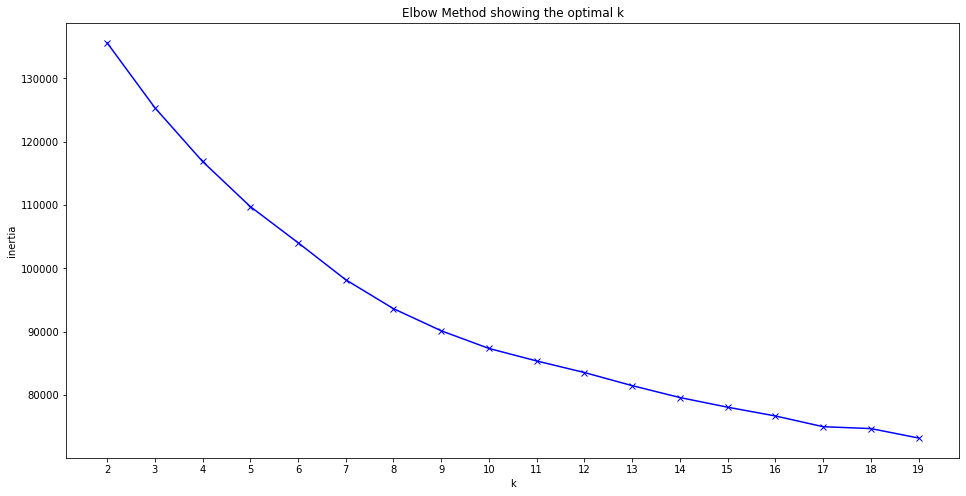

In [53]:
from sklearn.cluster import KMeans

import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

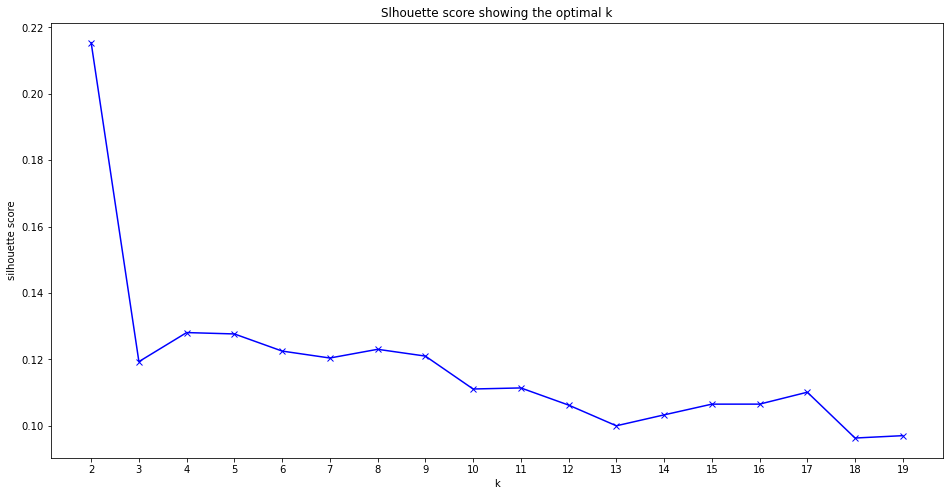

In [54]:

from tqdm import tqdm
from time import sleep
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=17, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=17, random_state=1234)

In [56]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0      887
1     1332
2      631
3     1201
4     1281
5      314
6      828
7      302
8      911
9      472
10     559
11     245
12    1317
13     549
14    1192
15      94
16      43
dtype: int64

In [57]:
clusters


array([ 1,  0,  7, ...,  9,  4, 12])

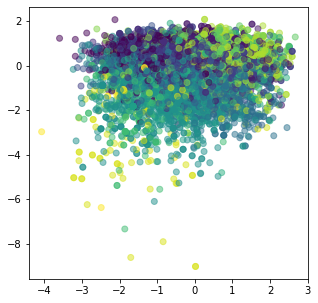

In [58]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 3], c=clusters,alpha=0.5)
plt.show()

In [59]:
kmeans.inertia_ 

74951.38270494326

In [60]:
clu_df=pd.DataFrame(df_c[["track.name","name"]])
clu_df["cluster"]=clusters
clu_df

track.name             name  cluster
0                        Firework       Katy Perry        1
1                      All We Are      OneRepublic        0
2                   Wake Up Alone    Amy Winehouse        7
3      The Man Who Can't Be Moved       The Script        4
4             Rolling in the Deep            Adele        1
...                           ...              ...      ...
21153                  I AM WOMAN        Emmy Meli        0
21154                    The Girl  City and Colour        9
21155                 The Funeral   Band of Horses        9
21156             Hallucinogenics      Matt Maeson        4
21157                      Brazil   Declan McKenna       12

[12158 rows x 3 columns]

In [61]:


# df = pd.DataFrame(clu_df)

# def recommend_song(input_str, df):
#     # Check if the input matches a song or artist
#     match = df[(df['track.name'] == input_str) | (df['name'] == input_str)]

#     if not match.empty:
#         cluster_number = match['cluster'].values[0]
#         recommendations = df[df['cluster'] == cluster_number]['track.name'].tolist()
#         recommendations.remove(input_str)  # Remove the input song from recommendations if it's in the same cluster
#         return recommendations
#     else:
#         return "Input not found in the dataset."

# # Take user input
# user_input = input("Enter a song or artist: ")

# # Get recommendations
# recommendations = recommend_song(user_input, df)

# if isinstance(recommendations, list):
#     if recommendations:
#         print(f"Recommendations based on the same cluster: {', '.join(recommendations)}")
#     else:
#         print("No recommendations found in the same cluster.")
# else:
#     print(recommendations)


Enter a song or artist: Firework
Recommendations based on the same cluster: Rolling in the Deep, So What, Price Tag - feat. B.o.B, Marry You, Take What You Take, Walk of Shame, We R Who We R, Just Friends, Domino, Boom Boom Pow, Karma, How to Save a Life, Raise Your Glass, Geronimo, Trap Queen, Goodbye, I Really Like You, Honey, I'm Good., It Ain't Over 'Til It's Over, Lovefool - Radio Edit, Don't Stop 'Til You Get Enough, I Don't Feel Like Dancin' - Radio Edit, For a Minute, Ghost, In Your Arms, Hold Each Other, Lovin' So Hard, Making The Most Of The Night, Still into You, Gone, Gone, Gone, Neon Lights, Give Your Heart a Break, Love Runs Out, Pompeii, Girls Chase Boys, Am I Wrong, Catch My Breath, Feel So Close - Radio Edit, 50 Ways to Say Goodbye, Unwritten, Fantasy, Wannabe, Cool Kids, Good Life, Jaded, Strange Love, Lithium, Like Em Young, Sunset Jesus, Can't Catch Me, Trouble, Dig, Good Times Bad Times - 1993 Remaster, Walkin' On The Sun, The Way I Tend To Be, Lips Are Movin, Feel

In [62]:

df_w_audio_ft["cluster"]=clusters
df_w_audio_ft

<ipython-input-62-46a53cf93586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w_audio_ft["cluster"]=clusters


track.name             name                 song_id  \
0                        Firework       Katy Perry  4lCv7b86sLynZbXhfScfm2   
1                      All We Are      OneRepublic  1Jx69b09LKTuBQxkEiFfVX   
2                   Wake Up Alone    Amy Winehouse  4u83mwF5tUuWlXS86UOXdu   
3      The Man Who Can't Be Moved       The Script  4Musyaro0NM5Awx8b5c627   
4             Rolling in the Deep            Adele  1CkvWZme3pRgbzaxZnTl5X   
...                           ...              ...                     ...   
21153                  I AM WOMAN        Emmy Meli  3nOz1U41SZZ0N3fuUWr9nb   
21154                    The Girl  City and Colour  1IFRVS4t1olI0XG9RBWdKH   
21155                 The Funeral   Band of Horses  5lRzWDEe7UuedU2QPsFg0K   
21156             Hallucinogenics      Matt Maeson  6bLU8e0LGyztE9iD5DWBQ1   
21157                      Brazil   Declan McKenna  5ftdTvmQjjsL23t7jxADfI   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.638   0.826    8    -4.968     1       0.0479        0.1390   
1             0.397   0.817    2    -5.495     1       0.0420        0.0966   
2             0.384   0.527   11    -5.294     0       0.0269        0.5420   
3             0.608   0.629   10    -5.024     1       0.0264        0.4230   
4             0.729   0.756    8    -5.119     1       0.0294        0.1310   
...             ...     ...  ...       ...   ...          ...           ...   
21153         0.646   0.471   10    -9.247     1       0.1570        0.1220   
21154         0.404   0.542   10    -7.578     1       0.0349        0.8370   
21155         0.319   0.757    0    -6.117     0       0.0432        0.0160   
21156         0.549   0.653    0    -7.470     1       0.0503        0.4570   
21157         0.689   0.617    4    -5.196     1       0.0290        0.0918   

       ...  valence    tempo            type                      id  \
0      ...    0.649  124.072  audio_features  4lCv7b86sLynZbXhfScfm2   
1      ...    0.416  158.004  audio_features  1Jx69b09LKTuBQxkEiFfVX   
2      ...    0.222  100.730  audio_features  4u83mwF5tUuWlXS86UOXdu   
3      ...    0.325   99.953  audio_features  4Musyaro0NM5Awx8b5c627   
4      ...    0.522  104.945  audio_features  1CkvWZme3pRgbzaxZnTl5X   
...    ...      ...      ...             ...                     ...   
21153  ...    0.455  170.084  audio_features  3nOz1U41SZZ0N3fuUWr9nb   
21154  ...    0.183  109.166  audio_features  1IFRVS4t1olI0XG9RBWdKH   
21155  ...    0.101  122.465  audio_features  5lRzWDEe7UuedU2QPsFg0K   
21156  ...    0.287  121.348  audio_features  6bLU8e0LGyztE9iD5DWBQ1   
21157  ...    0.682  121.062  audio_features  5ftdTvmQjjsL23t7jxADfI   

                                        uri  \
0      spotify:track:4lCv7b86sLynZbXhfScfm2   
1      spotify:track:1Jx69b09LKTuBQxkEiFfVX   
2      spotify:track:4u83mwF5tUuWlXS86UOXdu   
3      spotify:track:4Musyaro0NM5Awx8b5c627   
4      spotify:track:1CkvWZme3pRgbzaxZnTl5X   
...                                     ...   
21153  spotify:track:3nOz1U41SZZ0N3fuUWr9nb   
21154  spotify:track:1IFRVS4t1olI0XG9RBWdKH   
21155  spotify:track:5lRzWDEe7UuedU2QPsFg0K   
21156  spotify:track:6bLU8e0LGyztE9iD5DWBQ1   
21157  spotify:track:5ftdTvmQjjsL23t7jxADfI   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/4lCv7b86sLyn...   
1      https://api.spotify.com/v1/tracks/1Jx69b09LKTu...   
2      https://api.spotify.com/v1/tracks/4u83mwF5tUuW...   
3      https://api.spotify.com/v1/tracks/4Musyaro0NM5...   
4      https://api.spotify.com/v1/tracks/1CkvWZme3pRg...   
...                                                  ...   
21153  https://api.spotify.com/v1/tracks/3nOz1U41SZZ0...   
21154  https://api.spotify.com/v1/tracks/1IFRVS4t1olI...   
21155  https://api.spotify.com/v1/tracks/5lRzWDEe7Uue...   
21156  https://api.spotify.com/v1/tracks/6bLU8e0LGyzt...   
21157  https://api.spotify.com/v1/tracks/5ftdTv

In [66]:
import pandas as pd
import random

df = pd.DataFrame(df_w_audio_ft)

# Ask the user for input
user_input = input("Enter a track name or name: ").lower().replace(' ','')

# Check if the input matches either 'track.name' or 'name' column
if user_input in df['track.name'].values:
    cluster_number = df[df['track.name'] == user_input]['cluster'].iloc[0]
elif user_input in df['name'].values:
    cluster_number = df[df['name'] == user_input]['cluster'].iloc[0]
else:
    print("Input not found in the DataFrame.")
    exit()

# Filter the DataFrame by cluster number
cluster_df = df[df['cluster'] == cluster_number]

# Remove the input track.name or name from the filtered DataFrame (optional)
if user_input in cluster_df['track.name'].values:
    cluster_df = cluster_df[cluster_df['track.name'] != user_input]
if user_input in cluster_df['name'].values:
    cluster_df = cluster_df[cluster_df['name'] != user_input]

# Check if there are tracks in the same cluster for recommendation
if cluster_df.empty:
    print("No tracks found in the same cluster for recommendation.")
else:
    # Randomly select a track.name from the filtered DataFrame
    recommendation = random.choice(cluster_df['track.name'].values)
    print(f"Recommended track.name from the same cluster: {recommendation}")


Enter a track name or name: firework
Input not found in the DataFrame.
Recommended track.name from the same cluster: Goodbye


In [3]:
song_input = input('Please, enter a song title: ').lower().replace(' ','')

if song_input in df_w_audio_ft['track.name'].values:
    print(f'We recommend you: ', random.choice(df_w_audio_ft['song']))

elif song_input in feat['song_match'].values:
    
    series = feat[feat['song_match']==song_input].iloc[0]
    song_cluster = series['cluster']
    
    df = feat[(feat['cluster']==song_cluster)].reset_index()
    
    song_output = random.choice(df['song_id'])
    series2 = feat[feat['song_id']==song_output].iloc[0]
    song_output_name = series2['track.name']
    song_output_id = series2['song_id']
    song_output_url = 'https://open.spotify.com/track/'+song_output_id
    
    print('\nWe recommend you: ', song_output_name)
    print('Access the song: ', song_output_url)
    
else:
    print('Sorry, we don´t have recommendations for that title, try another one.')

Please, enter a song title: Firework


NameError: name 'df_w_audio_ft' is not defined